In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional 

In [ ]:
file = "./Andrej Sladkovic - Marina - edited 2.txt"

In [ ]:
with open(file) as f:
    data = f.read()

body = data.lower().split("\n")

In [ ]:
body[11]

'tak ona duchom svojím mi šatí'

In [ ]:
len(body)

2913

In [ ]:
# TOKENIZING

tokenizer = Tokenizer()
tokenizer.fit_on_texts(body)
total_words = len(tokenizer.word_index) + 1

len(tokenizer.word_index)

5199

In [ ]:
# N_GRAM SEQUENCES

def n_gram_seq(body, tokenizer):
    input_sequences = []

    for line in body:
        token_list = tokenizer.texts_to_sequences([line])[0]

        for i in range(1, len(token_list)):
            n_gram_s = token_list[:i+1]

            input_sequences.append(n_gram_s)
    
    return input_sequences

In [ ]:
input_sequences = n_gram_seq(body, tokenizer)

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])

In [ ]:
input_sequences[:5]

[[1712, 291],
 [1712, 291, 351],
 [1712, 291, 351, 351],
 [1712, 291, 351, 351, 56],
 [1712, 291, 351, 351, 56, 162]]

In [ ]:
# PADDING

def pad_seqs(input_sequences, maxlen):

    padded_sequences = np.array(pad_sequences(input_sequences, maxlen=maxlen, padding = 'pre'))

    return padded_sequences

In [ ]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

In [ ]:
input_sequences[0:5]

array([[   0,    0,    0,    0,    0,    0,    0, 1712,  291],
       [   0,    0,    0,    0,    0,    0, 1712,  291,  351],
       [   0,    0,    0,    0,    0, 1712,  291,  351,  351],
       [   0,    0,    0,    0, 1712,  291,  351,  351,   56],
       [   0,    0,    0, 1712,  291,  351,  351,   56,  162]],
      dtype=int32)

In [ ]:
input_sequences.shape

(11695, 9)

In [ ]:
# SPLIT FEATURES AND LABELS

def features_and_labels(input_sequences, total_words):
    
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes = total_words)

    return features, one_hot_labels

In [ ]:
features, labels = features_and_labels(input_sequences, total_words)

In [ ]:
features[0:5]

array([[   0,    0,    0,    0,    0,    0,    0, 1712],
       [   0,    0,    0,    0,    0,    0, 1712,  291],
       [   0,    0,    0,    0,    0, 1712,  291,  351],
       [   0,    0,    0,    0, 1712,  291,  351,  351],
       [   0,    0,    0, 1712,  291,  351,  351,   56]], dtype=int32)

In [ ]:
labels[0].max()

1.0

In [ ]:
# MODEL

model = Sequential()

model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(64, return_sequences = True )))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(total_words, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 100)            520000    
                                                                 
 bidirectional (Bidirectiona  (None, 8, 128)           84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 5200)              1336400   
                                                                 
Total params: 2,204,048
Trainable params: 2,204,048
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(features, labels, epochs = 300, verbose = 1)

Epoch 1/300
366/366 [==============================] - 31s 64ms/step - loss: 8.0868 - accuracy: 0.0300
Epoch 2/300
366/366 [==============================] - 23s 63ms/step - loss: 7.5657 - accuracy: 0.0295
Epoch 3/300
366/366 [==============================] - 24s 66ms/step - loss: 7.3682 - accuracy: 0.0310
Epoch 4/300
366/366 [==============================] - 23s 63ms/step - loss: 7.1286 - accuracy: 0.0345
Epoch 5/300
366/366 [==============================] - 23s 63ms/step - loss: 6.7865 - accuracy: 0.0357
Epoch 6/300
366/366 [==============================] - 23s 64ms/step - loss: 6.3653 - accuracy: 0.0403
Epoch 7/300
366/366 [==============================] - 23s 63ms/step - loss: 5.8814 - accuracy: 0.0499
Epoch 8/300
366/366 [==============================] - 23s 63ms/step - loss: 5.3546 - accuracy: 0.0656
Epoch 9/300
366/366 [==============================] - 23s 63ms/step - loss: 4.8362 - accuracy: 0.0932
Epoch 10/300
366/366 [==============================] - 23s 63ms/step - l

<function matplotlib.pyplot.show(*args, **kw)>

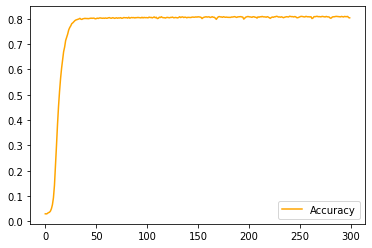

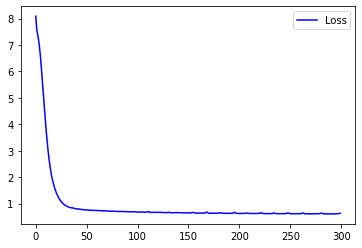

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

plt.plot(accuracy, color = 'orange', label='Accuracy')
plt.legend()

plt.figure()

plt.plot(loss,color = 'blue', label='Loss')

plt.legend()
plt.show

In [ ]:
model.save('marina.h5')

In [ ]:
seed_text = "Maruska kde si ty?"
next_words = 100
  
for _ in range(next_words):

    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted, axis=-1).item()
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word

print(seed_text)

Maruska kde si ty? duše drahé chudoby rozkladá rozkladá z očí ľadoch let cíti mi ruží ti blažený milý suchotách veselá v kvetnom poli mládenský chodievať moje zrakoch spať hlasoch tým vodám vodám bývať po drahú v žriedlam ľúbosti život večné pani let zrakom svätých nevieš zanikne hodiny postavy skaly tým volá života po ňadrách skaly svieti znamenajú padne tým ozýva sa k schladlé bys' vek raj vlasť zreteľné doby velebných ty tvoj svoju mládenských trasú dvoch vencoch moji javí mrie prameňom vodám mladý chodí tón strachu bielosť tvoj sladký skoku let sláva sen jak vlnka im sen skale moje moje má má tón
